# 2019-yil uchun "C. Məmmədquluzadə" supermarketidagi savdo holati


In [1]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/C.%20M%C9%99mm%C9%99dquluzad%C9%99.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,JIQULI 2LT PIVE PL/Q,Pivo,5.35,2019-03-14,False
1,BINGO SOFT 2LT LOVELY YUMSALDICI,"Yuvish vositalari, tozalagichlar",4.45,2019-03-14,False
2,BEBETO 35GR JELEBON DRINK COLA,Shirinliklar,0.50,2019-03-14,False
3,BERRAK 1600GR QARISIQ TURSU,Tuzlamalar,5.45,2019-03-14,False
4,ARKOM DIABET 44GR KARAMEL DUSES,Diabet mahsulotlari,1.30,2019-08-07,False
5,ABC 3L YUMSALDICI MANOLYA HAYALI,"Yuvish vositalari, tozalagichlar",6.95,2019-08-07,False
6,KONFET LUKAS SUN GRIZZY KG,Shirinliklar,5.50,2019-08-07,False
7,BIEN YUMURTA FIRCASI KU-168,Idish-tovoq,1.60,2019-08-07,False
8,LEZZET 900GR LOKUM CEREZLI QUTU,Shirinliklar,6.40,2019-08-07,False
9,CESME 0.5LT QAZSIZ SU,Suvlar,0.85,2019-08-07,False


In [3]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21021 entries, 0 to 21020
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   21021 non-null  object 
 1   mahsulot_turi   21021 non-null  object 
 2   mahsulot_narhi  21021 non-null  float64
 3   sotilgan_vaqti  21021 non-null  object 
 4   bonus_karta     21021 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 677.6+ KB


In [4]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [5]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21021 entries, 0 to 21020
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21021 non-null  object        
 1   mahsulot_turi   21021 non-null  object        
 2   mahsulot_narhi  21021 non-null  float64       
 3   sotilgan_vaqti  21021 non-null  datetime64[ns]
 4   bonus_karta     21021 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 677.6+ KB


In [6]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2141
1886
2186
1998
2240
1991
2050
2215
2155
2150
9
0


In [7]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2141
1886
2186
1998
2240
1991
2050
2215
2155
2150
0
0


In [8]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,JIQULI 2LT PIVE PL/Q,Pivo,5.35,2019-03-14,False
1,BINGO SOFT 2LT LOVELY YUMSALDICI,"Yuvish vositalari, tozalagichlar",4.45,2019-03-14,False
2,BEBETO 35GR JELEBON DRINK COLA,Shirinliklar,0.50,2019-03-14,False
3,BERRAK 1600GR QARISIQ TURSU,Tuzlamalar,5.45,2019-03-14,False
4,ARKOM DIABET 44GR KARAMEL DUSES,Diabet mahsulotlari,1.30,2019-08-07,False
...,...,...,...,...,...
21016,MARANDI 750ML YANARDAG QIRMIZI KEMSIRIN SERAB S/Q,Vinolar,5.10,2019-07-19,True
21017,LAYCY QUEEN 42GR PIROQ BELQIYSKIY DES.VANILLI,Shirinliklar,0.38,2019-07-19,True
21018,PAGO 750ML TEBII SIRE VISNE S/Q,Mevali sharbatlar,4.70,2019-07-19,True
21019,DOYMAK 500GR MAKARON BALIQ QULAGI,Donli mahsulotlar,0.90,2019-07-19,True


In [9]:
#9 2019-yilda "C. Məmmədquluzadə" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4832
Maishiy buyumlar,1108
Mevali sharbatlar,1029
"Yuvish vositalari, tozalagichlar",1006
Idish-tovoq,793
...,...
Shampan,18
Kefir,18
Tayyor ovqatlar,10
Muzlatilgan mahsulotlar,4


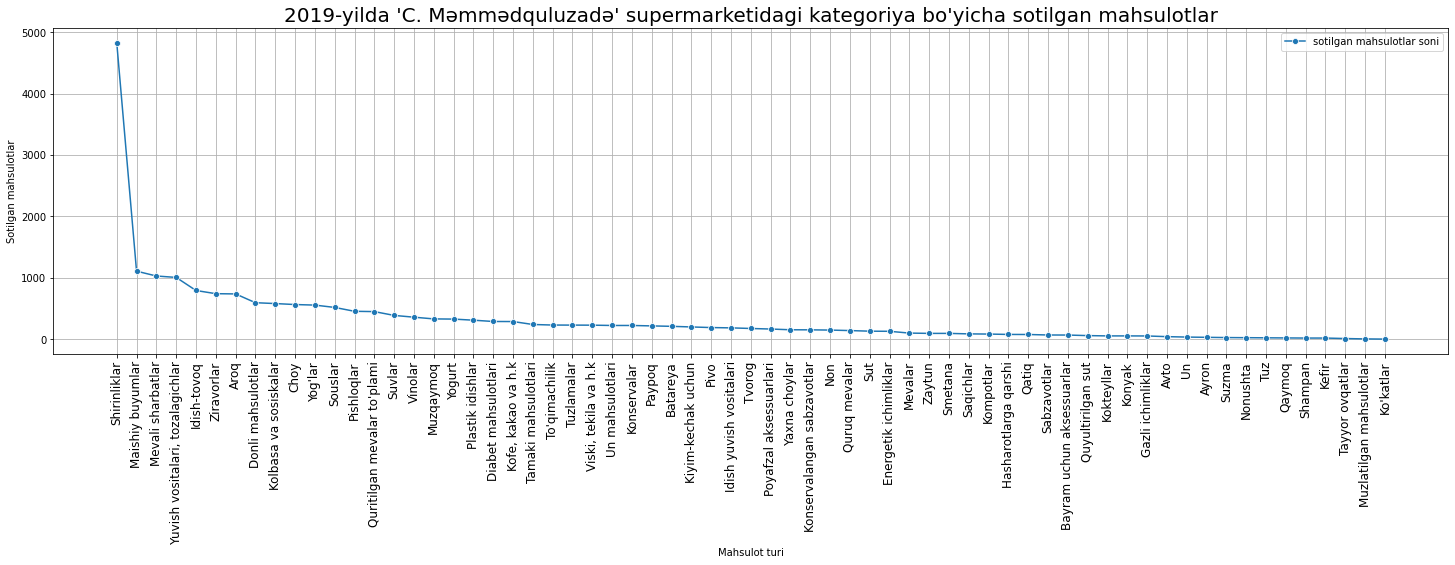

In [10]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'C. Məmmədquluzadə' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [11]:
#10 2019-yilda "C. Məmmədquluzadə" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,11462.06
Avto,236.04
Ayron,18.95
Batareya,854.75
Bayram uchun aksessuarlar,208.76
...,...
Yog'lar,4763.55
Yogurt,402.98


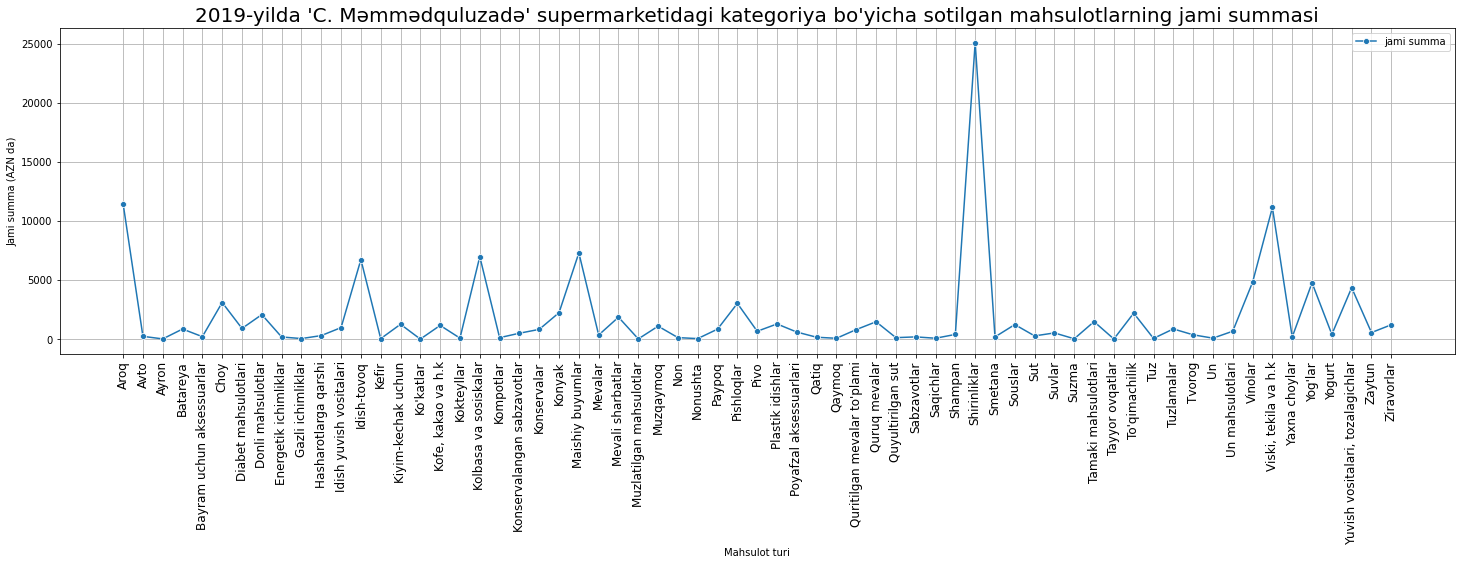

In [12]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'C. Məmmədquluzadə' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [13]:
#11 2019-yilda "C. Məmmədquluzadə" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10595,10417


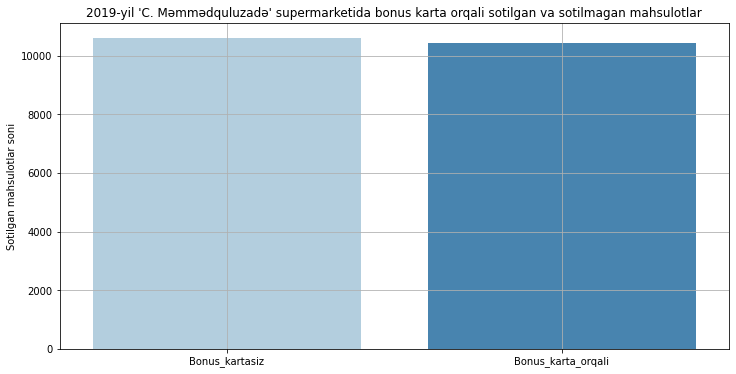

In [14]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'C. Məmmədquluzadə' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [15]:
#12 2019-yilda "C. Məmmədquluzadə" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2141
Fevral,1886
Mart,2186
Aprel,1998
May,2240
Iyun,1991
Iyul,2050
Avgust,2215
Sentabr,2155
Oktabr,2150


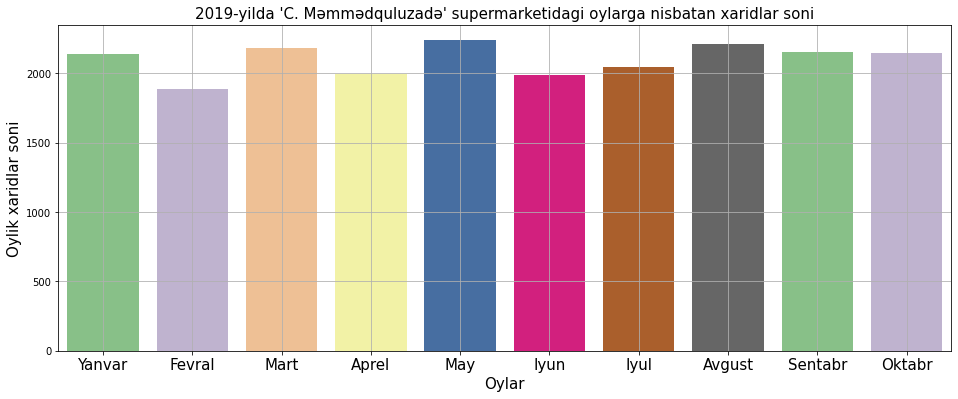

In [16]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'C. Məmmədquluzadə' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [17]:
#13 2019-yilda "C. Məmmədquluzadə" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3196
Seshanba,2968
Chorshanba,2907
Payshanba,2998
Juma,3066
Shanba,2974
Yakshanba,2903


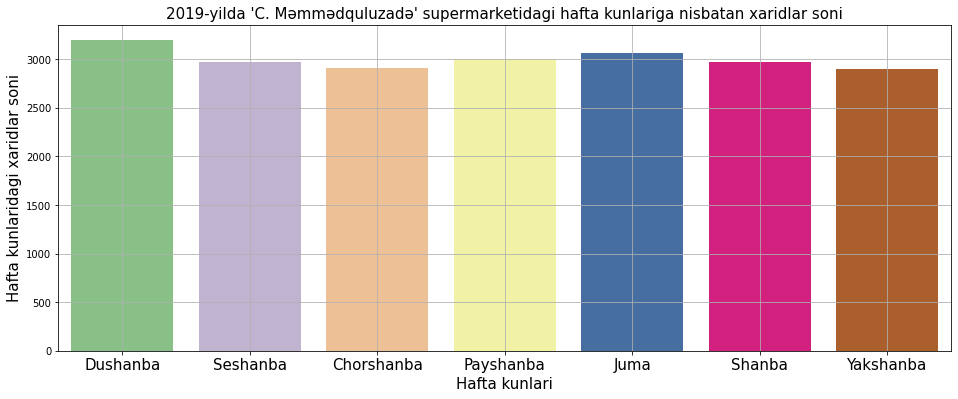

In [18]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'C. Məmmədquluzadə' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [19]:
#14 2019-yilda "C. Məmmədquluzadə" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,740
2,630
3,636
4,694
5,577
6,678
7,708
8,805
9,628
10,707


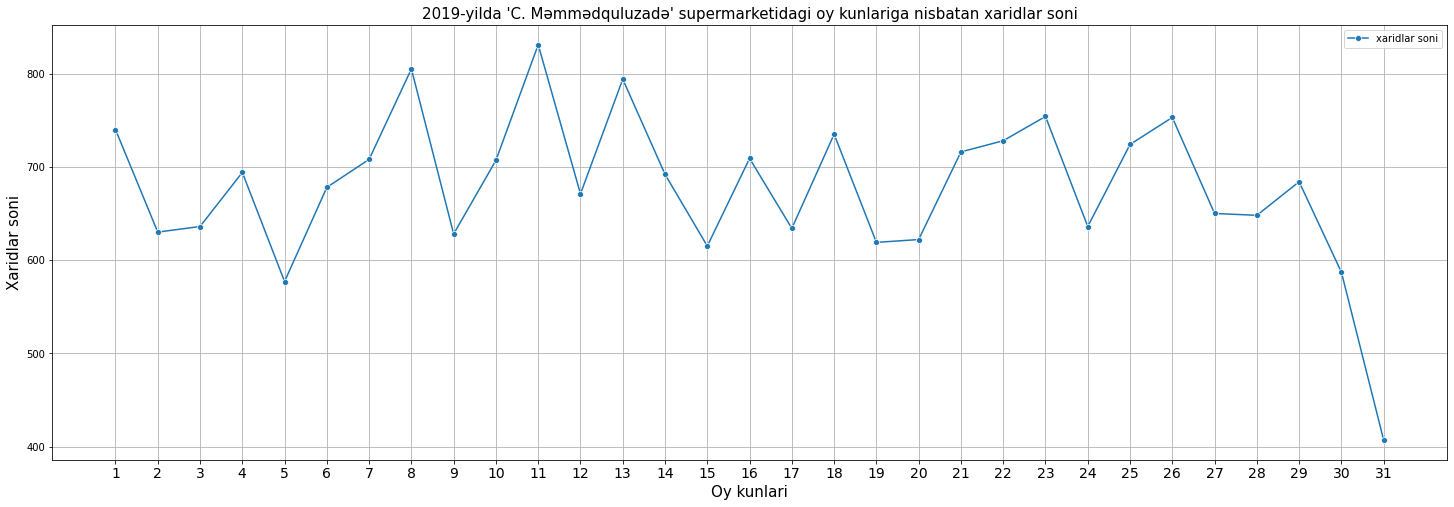

In [20]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'C. Məmmədquluzadə' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [21]:
#15 2019-yil 'C. Məmmədquluzadə' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [22]:
len(oy_sanalari)

310

In [23]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [24]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [25]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,68,71,72,53,36,74,78,82,52,68,57,89,60,94,60,66,43,89,56,66,90,78,89,97,76,87,67,63,61,42,57
Fevral,77,83,54,45,56,62,77,67,66,61,51,100,87,31,103,87,52,52,84,39,74,84,64,54,64,77,46,89,0,0,0
Mart,99,78,63,100,55,52,41,89,63,84,113,21,95,97,52,26,86,36,86,42,53,78,81,60,94,51,62,28,120,64,117
Aprel,99,35,60,114,41,67,46,69,44,62,122,112,67,69,50,86,62,60,62,62,83,57,57,41,61,92,43,59,53,63,0
May,31,66,66,72,62,76,75,90,75,53,70,66,90,66,75,71,49,90,83,100,64,71,107,60,80,50,109,92,59,62,60
Iyun,24,65,104,55,48,65,66,73,51,77,67,70,97,60,71,74,66,109,23,58,62,62,47,90,92,43,31,63,109,69,0
Iyul,96,32,54,53,44,76,56,91,75,49,110,64,70,43,38,74,70,78,41,71,74,83,53,87,51,115,66,78,54,53,51
Avgust,91,93,65,75,60,64,65,50,74,112,101,37,95,112,80,76,77,68,71,60,75,77,67,75,28,81,82,75,45,44,40
Sentabr,69,33,60,87,75,81,101,87,58,85,80,65,62,57,53,59,61,57,54,71,59,87,122,37,104,74,74,46,107,90,0
Oktabr,86,74,38,40,100,61,103,107,70,56,60,47,71,63,33,90,68,96,59,53,82,51,67,35,74,83,70,55,76,100,82


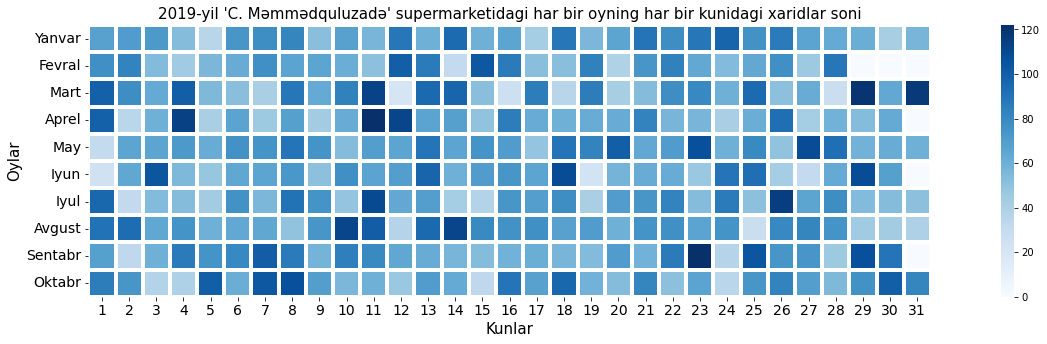

In [26]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'C. Məmmədquluzadə' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

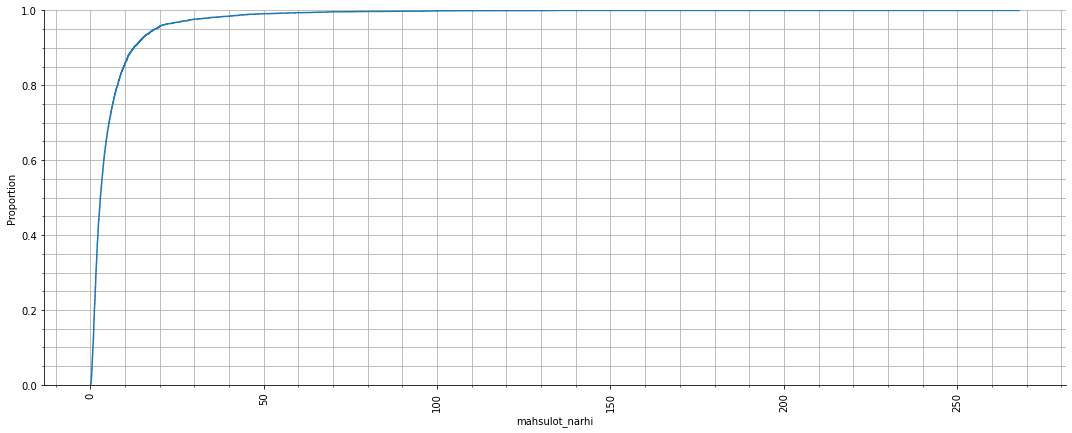

In [27]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()